# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Santiago silva
*Métodos computacionales 2025-I*

---

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.integrate import quad, simpson, dblquad

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

DataFrame de los datos:
   Tiempo (s)  Corriente (A)
0        1.00           3.10
1        1.01           3.12
2        1.02           3.14
3        1.03           3.18
4        1.04           3.24
Voltaje aproximado con diferencias finitas:
t = 1.00 s -> ε(t) = 2.40020 V
t = 1.01 s -> ε(t) = 2.40304 V
t = 1.02 s -> ε(t) = 3.38588 V
t = 1.03 s -> ε(t) = 5.35156 V
t = 1.04 s -> ε(t) = 6.34008 V
Voltaje aproximado con derivada del polinomio de Lagrange:
t = 1.00 s -> ε(t) = 3.54353 V
t = 1.01 s -> ε(t) = 1.91304 V
t = 1.02 s -> ε(t) = 3.22255 V
t = 1.03 s -> ε(t) = 5.51489 V
t = 1.04 s -> ε(t) = 6.83008 V


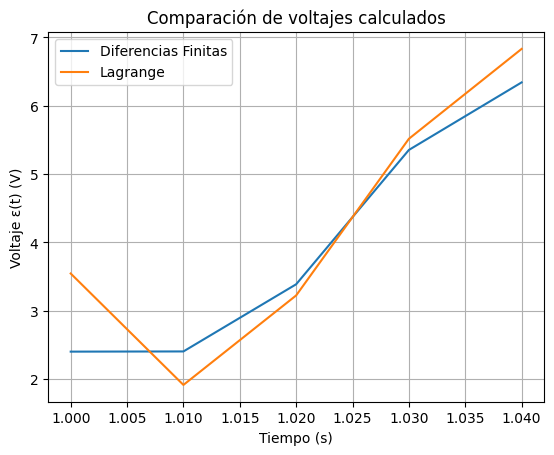

In [4]:

t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
L = 0.98  #Inductancia en Henrios
R = 0.142  #Resistencia en Ohmios

#dataframe
df = pd.DataFrame({'Tiempo (s)': t, 'Corriente (A)': i})
print("DataFrame de los datos:")
print(df)

#diferencias finitas
# Crear arreglo para la derivada
di_dt_fd = np.zeros(len(i))

#Derivada centrada para los puntos interiores
for j in range(1, len(i)-1):

    di_dt_fd[j] = (i[j+1] - i[j-1]) / (t[j+1] - t[j-1])

# Derivada hacia adelante en el primer punto
di_dt_fd[0] = (i[1] - i[0]) / (t[1] - t[0])

# Derivada hacia atrás en el último punto
di_dt_fd[-1] = (i[-1] - i[-2]) / (t[-1] - t[-2])

#voltaje aproximado con diferencias finitas
voltaje_fd = L * di_dt_fd + R * i

print("Voltaje aproximado con diferencias finitas:")
for k in range(len(t)):

    print(f"t = {t[k]:.2f} s -> ε(t) = {voltaje_fd[k]:.5f} V")

#Interpolación con polinomio de Lagrange
polinomio_lagrange = lagrange(t, i)

derivada_pol = np.polyder(polinomio_lagrange)
di_dt_lagrange = derivada_pol(t) #evalua la derivada

#voltaje usando la derivada del polinomio
voltaje_lagrange = L * di_dt_lagrange + R * i

print("Voltaje aproximado con derivada del polinomio de Lagrange:")
for k in range(len(t)):
    print(f"t = {t[k]:.2f} s -> ε(t) = {voltaje_lagrange[k]:.5f} V")

#comparacion metodos
plt.plot(t, voltaje_fd, label='Diferencias Finitas')
plt.plot(t, voltaje_lagrange, label='Lagrange')
plt.title("Comparación de voltajes calculados")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje ε(t) (V)")
plt.legend()
plt.grid(True)
plt.show()

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [6]:
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m

# Velocidad instantánea por diferencias finitas
v = np.zeros_like(x, dtype=float)
v[0] = (x[1] - x[0]) / (t[1] - t[0])
v[1:-1] = (x[2:] - x[:-2]) / (t[2:] - t[:-2])
v[-1] = (x[-1] - x[-2]) / (t[-1] - t[-2])

for ti, vi in zip(t, v):

    print(f"t = {ti:>2} s -> v ≈ {vi:.2f} m/s")

#interpolación para estimar velocidad en t = 12
pol = lagrange(t, x)
dpol = np.polyder(pol)
print(f"\nv(12) ≈ {dpol(12):.2f} m/s")


t =  0 s -> v ≈ 75.00 m/s
t =  3 s -> v ≈ 76.60 m/s
t =  5 s -> v ≈ 79.60 m/s
t =  8 s -> v ≈ 71.80 m/s
t = 10 s -> v ≈ 74.00 m/s
t = 13 s -> v ≈ 83.67 m/s

v(12) ≈ 91.74 m/s


# 3.
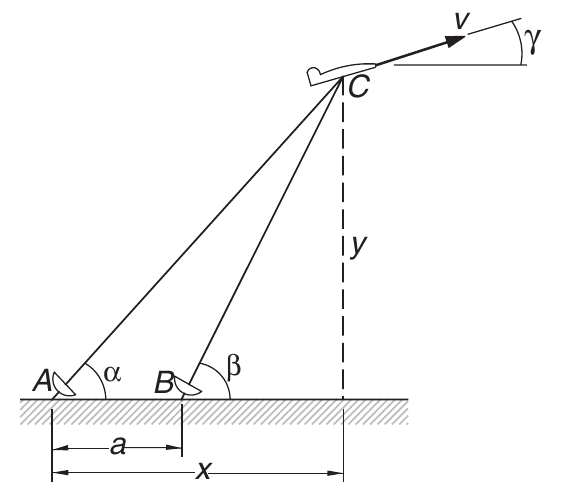


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [8]:
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
a = 500 #distancia entre estaciones

#ángulos a radianes
alpha = np.radians(df['alpha (°)'].values)
beta = np.radians(df['beta (°)'].values)
t = df['t (s)'].values

tan_alpha = np.tan(alpha)
tan_beta = np.tan(beta)
x = a * tan_beta / (tan_beta - tan_alpha)
y = a * tan_alpha * tan_beta / (tan_beta - tan_alpha)

#Derivadas centradas en t = 10
vx = (x[2] - x[0]) / (t[2] - t[0])
vy = (y[2] - y[0]) / (t[2] - t[0])

#velocidad y ángulo de ascenso
v = np.sqrt(vx**2 + vy**2)
gamma = np.degrees(np.arctan2(vy, vx))

print(f"Velocidad v = {v:.2f} m/s")
print(f"Ángulo de ascenso γ = {gamma:.2f}°")


Velocidad v = 50.10 m/s
Ángulo de ascenso γ = 15.14°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [12]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

# 1. usando regla del trapecio
i28 = np.where(t == 28)[0][0]  # índice donde t = 28
d = np.trapezoid(v[:i28+1], t[:i28+1])

# 2. Aceleracion en t = 28 s (usando datos en t = 24 y t = 32)
i = i28
a = (v[i+1] - v[i-1]) / (t[i+1] - t[i-1])

# Resultados
print(f"Distancia recorrida = {d:.2f} m")
print(f"Aceleración en t = 28s, = {a:.2f} m/s²")

Distancia recorrida = 2309.00 m
Aceleración en t = 28s, = 1.72 m/s²


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [13]:
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)

# Calculamos el área superficial horizontal As(z) (As(z) = -dV/dz usamos la derivada discreta) con diferencias finitas
As = -np.gradient(V, z)  # área en unid cuadradas

# volumen total usando integración metodo trapecios
VT = np.trapezoid(As, z)  # integral de As(z)dz → volumen total

#numerador de la formula de c promedio
num = np.trapezoid(c * As, z)

c_prom = num / VT #concentración promedio

print("Área superficial As(z):", As)
print("Volumen total VT:", VT, "m³")
print("Concentración promedio:", c_prom, "g/m³")

Área superficial As(z): [1178100.   981750.   589050.   245437.5   98175. ]
Volumen total VT: 9817500.0 m³
Concentración promedio: 8.226 g/m³


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [18]:
def integrando(r):
    return r**2 * (2 - r)**2 * np.exp(-r)

#R E 10, 25 con paso 1
R_vals = np.arange(10, 26, 1)

P_trapz = []
P_simps = []
P_quad = []

n_puntos = 1000

#calculamos P(R)
for R in R_vals:

    r = np.linspace(0, R, n_puntos)
    f = integrando(r)

    #trapezoidal
    P_t = (1/8) * np.trapezoid(f, r)
    P_trapz.append(P_t)

    #Simpson
    P_s = (1/8) * simpson(f, r)
    P_simps.append(P_s)

    # Cuadratura
    P_q, _ = quad(integrando, 0, R, epsabs=1e-6)
    P_quad.append((1/8) * P_q)

#verificamos la probabilidad total
P_total, err_total = quad(integrando, 0, np.inf, epsabs=1e-10)
P_total *= 1/8

print(" R\tTrapecio\tSimpson\t\tCuadratura")
for i in range(len(R_vals)):
    print(f"{R_vals[i]:2d}\t{P_trapz[i]:.6f}\t{P_simps[i]:.6f}\t{P_quad[i]:.6f}")

print("\nProbabilidad total (0 a ∞):", round(P_total, 8))
print("Error estimado:", f"{err_total:.1e}")

 R	Trapecio	Simpson		Cuadratura
10	0.940481	0.940481	0.940481
11	0.968223	0.968223	0.968223
12	0.983552	0.983552	0.983552
13	0.991708	0.991708	0.991708
14	0.995913	0.995913	0.995913
15	0.998025	0.998025	0.998025
16	0.999062	0.999062	0.999062
17	0.999561	0.999561	0.999561
18	0.999797	0.999797	0.999797
19	0.999908	0.999908	0.999908
20	0.999958	0.999958	0.999958
21	0.999981	0.999981	0.999981
22	0.999992	0.999992	0.999992
23	0.999996	0.999996	0.999996
24	0.999998	0.999998	0.999998
25	0.999999	0.999999	0.999999

Probabilidad total (0 a ∞): 1.0
Error estimado: 1.1e-08


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

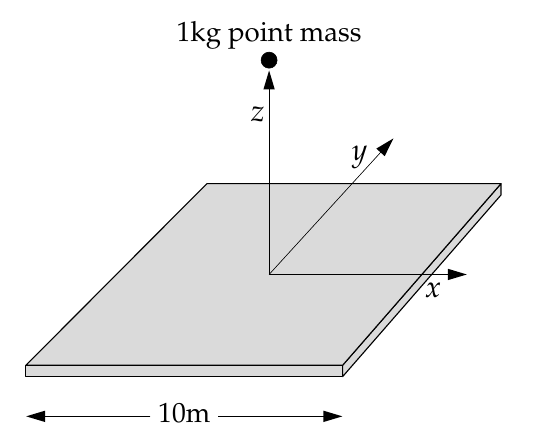

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


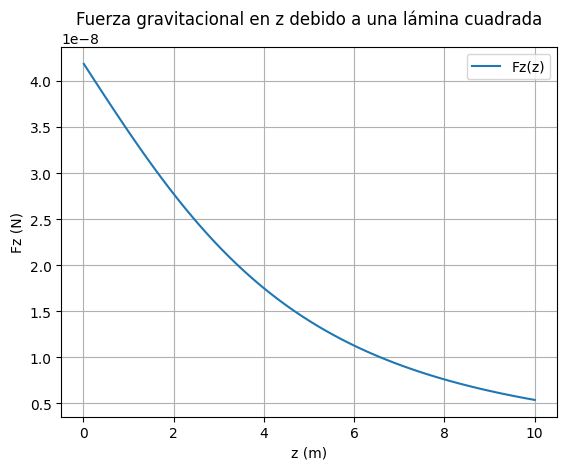

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

G = 6.674e-11 # constante de gravitación universal
L = 10 # lado de la lámina en metros
M = 10000 # masa total en kg
sigma = M / (L**2) #densidad superficial


def integrando(y, x, z):

    return 1 / ( (x**2 + y**2 + z**2)**(3/2) )

z_vals = np.linspace(0.01, 10, 100)
Fz_vals = []

for z in z_vals:

    integral, err = dblquad(
        integrando,
        -L/2, L/2,
        lambda x: -L/2,
        lambda x: L/2,
        args=(z,)
    )
    Fz = G * sigma * z * integral
    Fz_vals.append(Fz)

plt.plot(z_vals, Fz_vals, label="Fz(z)")
plt.xlabel("z (m)")
plt.ylabel("Fz (N)")
plt.title("Fuerza gravitacional en z debido a una lámina cuadrada")
plt.grid(True)
plt.legend()
plt.show()
